**author**: lukethompson@gmail.com<br>
**date**: 27 Feb 2017<br>
**language**: Python 3.5<br>
**conda enviroment**: emp-py3<br>
**license**: unlicensed<br>

## alpha_diversity_correlation.ipynb

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from empcolors import get_empo_cat_color

In [2]:
colors = ['#1f78b4',
          '#33a02c',
          '#e31a1c',
          '#ff7f00',
          '#6a3d9a',
          '#a6cee3',
          '#b2df8a',
          '#fb9a99',
          '#fdbf6f',
          '#cab2d6',
          '#000000']
sns.set_palette(colors)

#sns.set(style='ticks')

In [3]:
path_map = '/Users/luke/emp/metadata-refine/emp_qiime_mapping_qc_filtered.tsv'
path_adiv = '/Users/luke/emp/analyses-adiv/emp.90.min25.deblur.withtax.onlytree_5000.txt'

In [4]:
df_map = pd.read_csv(path_map, sep='\t', index_col=0, low_memory=False)
df_adiv = pd.read_csv(path_adiv, sep='\t', index_col=0)

In [5]:
df_merged = pd.merge(df_map, df_adiv, how='inner', left_index=True, right_index=True)

In [6]:
ylabels = {
    'salinity_psu': 'Salinity (psu)',
    'temperature_deg_c': 'Temperature ($^\circ$C)',
    'ph': 'pH',
    'oxygen_mg_per_l': 'Oxygen (mg/L)',
    'latitude_deg': 'Latitude ($^\circ$)',
    'longitude_deg': 'Longitude ($^\circ$)',
    'altitude_km': 'Altitude (km)',
    'elevation_m': 'Elevation (m)'
}

In [7]:
def make_scatter(df, xvar, yvar, sample_type, color):
    plt.scatter(df[xvar], df[yvar], marker='o', color=color, alpha=0.2, facecolor='none', linewidths=1, s=30, label=sample_type)
#     if (yvar == 'observed_otus'):
#         plt.ylabel('Observed OTUs (identical 100-bp V4 16S rRNA)')
#     else:
#         plt.ylabel(yvar)

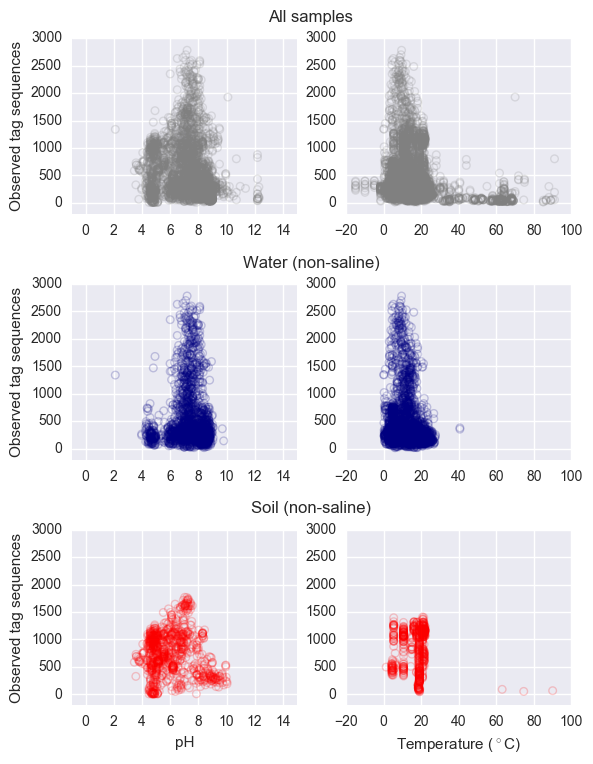

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(6, 7.5))

## ALL BLACK
# ph
plt.sca(ax[0, 0])
for sample_type in df_merged[[not np.isnan(x[1]) for x in df_merged.ph.iteritems()]].empo_3.value_counts().index:
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'ph', 'observed_otus', sample_type, 
                 color='gray')
plt.text(16, 3300, 'All samples', fontsize=12, horizontalalignment='center')
plt.ylabel('Observed tag sequences')
plt.ylim(-200, 3000)
plt.xlabel('')
plt.xlim(-1, 15)

# temp
plt.sca(ax[0, 1])
for sample_type in df_merged[[not np.isnan(x[1]) for x in df_merged.temperature_deg_c.iteritems()]].empo_3.value_counts().index:
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'temperature_deg_c', 'observed_otus', sample_type, 
                 color='gray')
plt.ylim(-200, 3000)
#plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel('')
plt.xlim(-20, 100)

## WATER
empo3 = 'Water (non-saline)'
# ph
plt.sca(ax[1, 0])
for sample_type in [empo3]: #df_merged[[not np.isnan(x[1]) for x in df_merged.ph.iteritems()]].empo_3.value_counts().index:
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'ph', 'observed_otus', sample_type, 
                 color=get_empo_cat_color(empo3))
plt.text(16, 3300, empo3, fontsize=12, horizontalalignment='center')
plt.ylabel('Observed tag sequences')
plt.ylim(-200, 3000)
plt.xlabel('')
plt.xlim(-1, 15)

# temp
plt.sca(ax[1, 1])
for sample_type in [empo3]: #df_merged[[not np.isnan(x[1]) for x in df_merged.temperature_deg_c.iteritems()]].empo_3.value_counts().index:
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'temperature_deg_c', 'observed_otus', sample_type, 
                 color=get_empo_cat_color(empo3))
plt.ylim(-200, 3000)
#plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel(' ')
plt.xlim(-20, 100)

## SOIL
empo3 = 'Soil (non-saline)'
# ph
plt.sca(ax[2, 0])
for sample_type in [empo3]: #df_merged[[not np.isnan(x[1]) for x in df_merged.ph.iteritems()]].empo_3.value_counts().index:
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'ph', 'observed_otus', sample_type, 
                 color=get_empo_cat_color(empo3))
plt.text(16, 3300, empo3, fontsize=12, horizontalalignment='center')
plt.ylabel('Observed tag sequences')
plt.ylim(-200, 3000)
plt.xlabel('pH')
plt.xlim(-1, 15)

# temp
plt.sca(ax[2, 1])
for sample_type in [empo3]: #df_merged[[not np.isnan(x[1]) for x in df_merged.temperature_deg_c.iteritems()]].empo_3.value_counts().index:
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'temperature_deg_c', 'observed_otus', sample_type, 
                 color=get_empo_cat_color(empo3))
plt.ylim(-200, 3000)
#plt.gca().axes.get_yaxis().set_ticks([])
plt.xlabel(ylabels['temperature_deg_c'])
plt.xlim(-20, 100)

sns.despine(trim=True)
plt.tight_layout(pad=0.8, h_pad=2.5, w_pad=0.5)
plt.savefig('/Users/luke/emp/plots/obs_otus_vs_env.pdf', bbox_inches='tight')

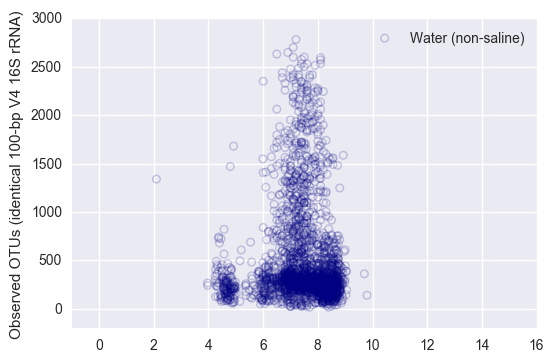

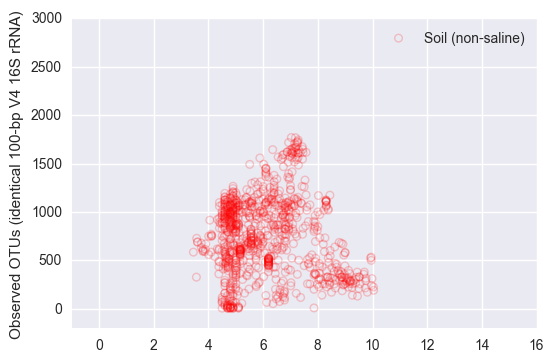

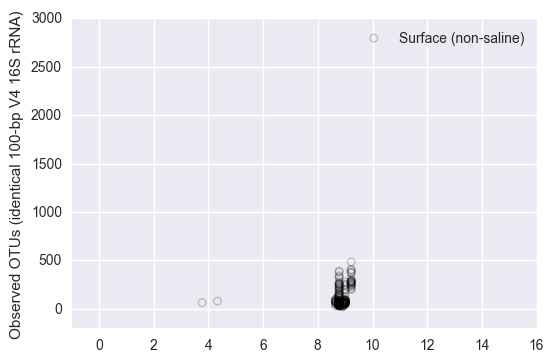

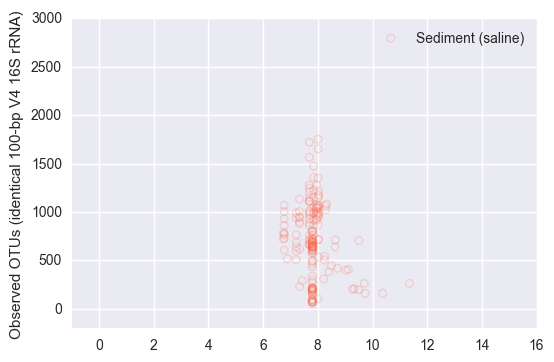

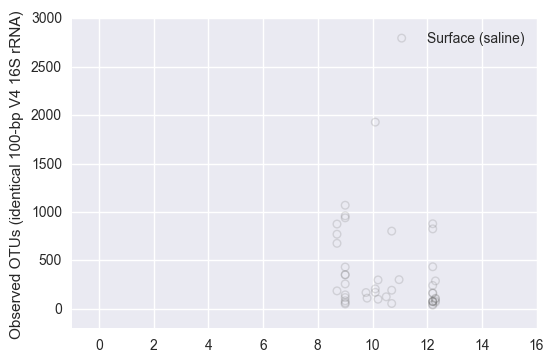

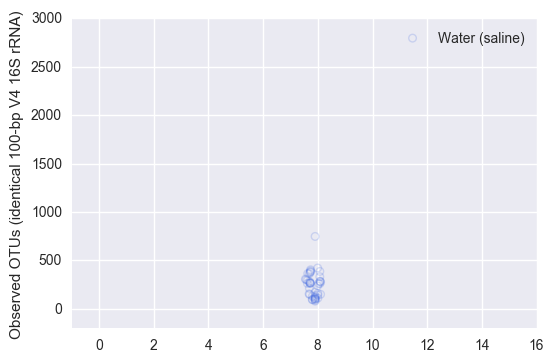

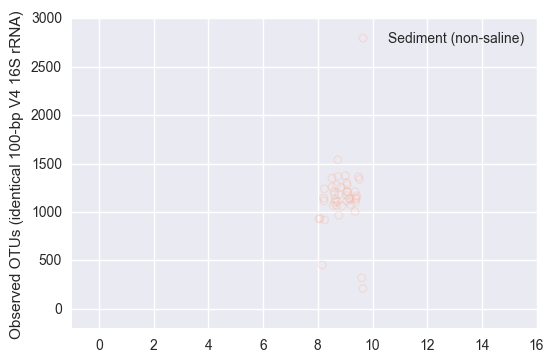

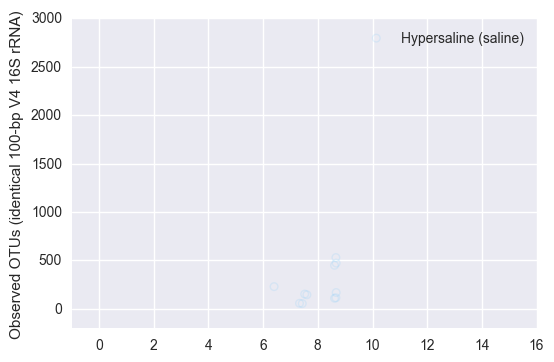

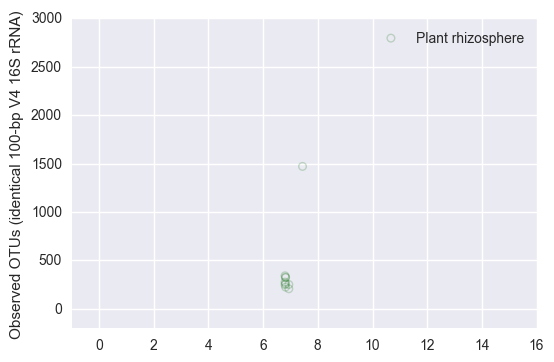

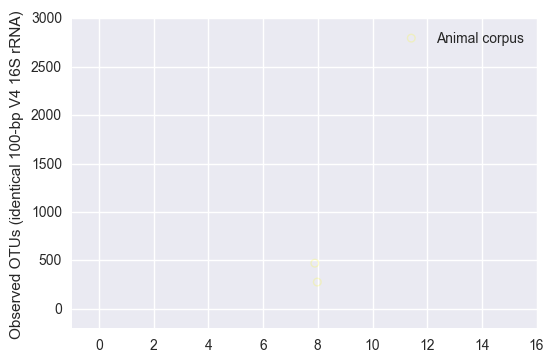

In [9]:
for sample_type in df_merged[[not np.isnan(x[1]) for x in df_merged.ph.iteritems()]].empo_3.value_counts().index:    
    plt.figure(figsize=(6,4))
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'ph', 'observed_otus', sample_type, 
                 get_empo_cat_color(sample_type))
    plt.legend()
    plt.ylim(-200, 3000)
    plt.xlim(-1, 16)
    plt.ylabel('Observed OTUs (identical 100-bp V4 16S rRNA)')

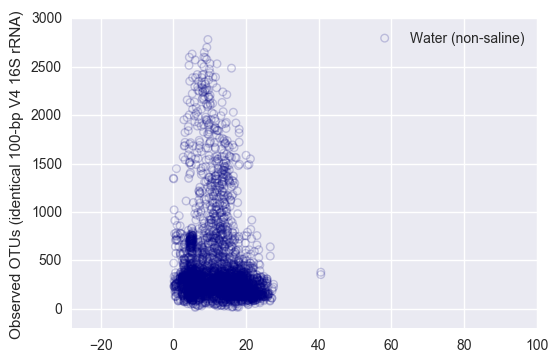

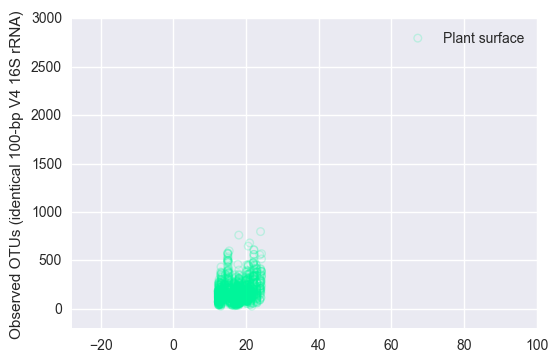

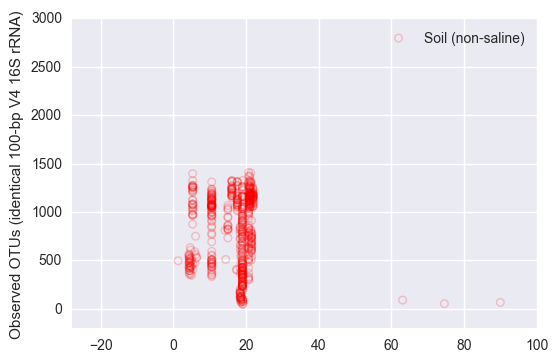

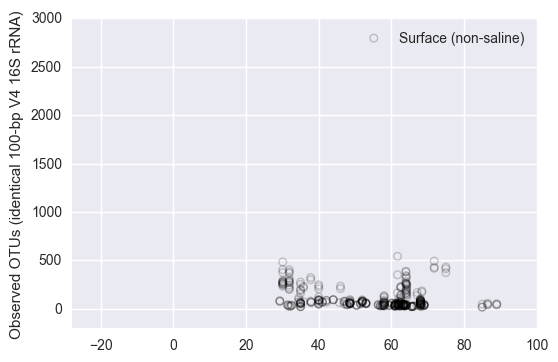

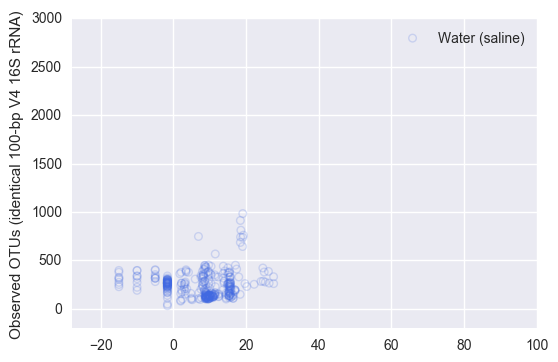

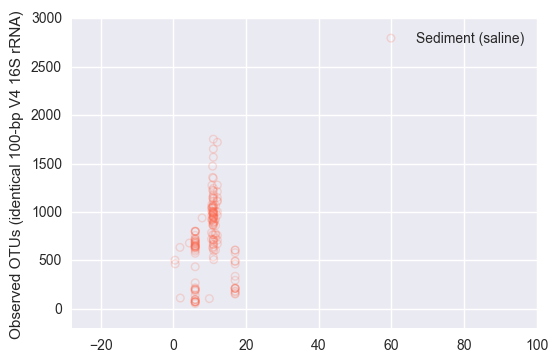

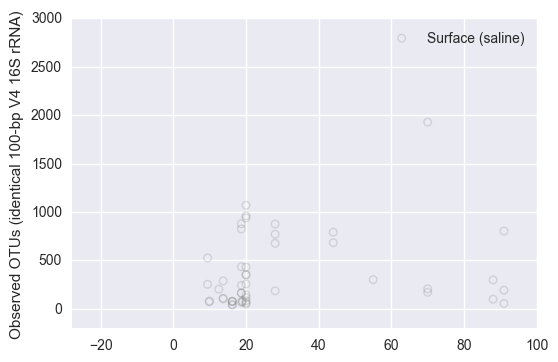

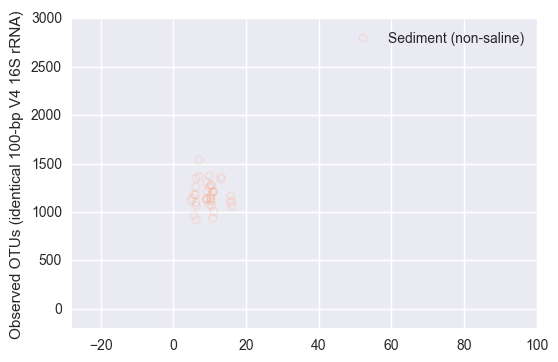

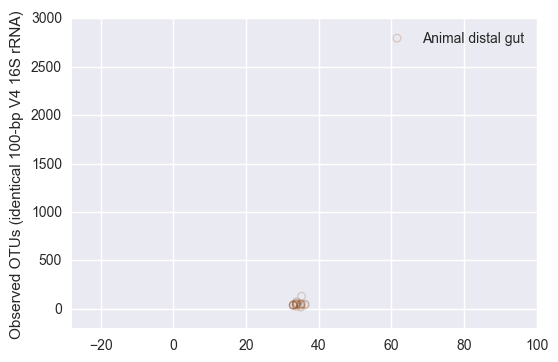

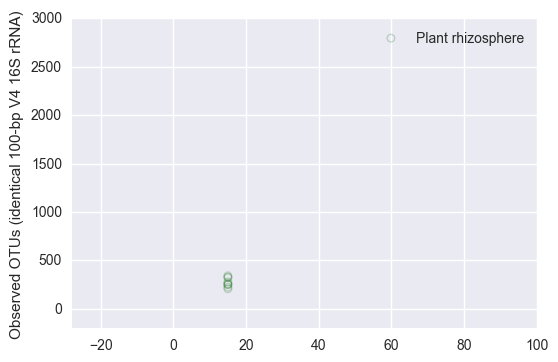

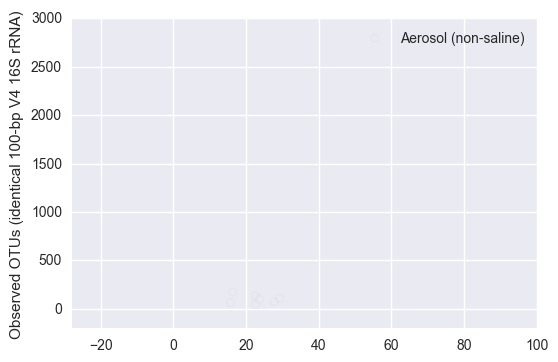

In [10]:
for sample_type in df_merged[[not np.isnan(x[1]) for x in df_merged.temperature_deg_c.iteritems()]].empo_3.value_counts().index:    
    plt.figure(figsize=(6,4))
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'temperature_deg_c', 'observed_otus', sample_type, 
                get_empo_cat_color(sample_type))
    plt.legend()
    plt.ylim(-200, 3000)
    plt.xlim(-28, 100)
    plt.ylabel('Observed OTUs (identical 100-bp V4 16S rRNA)')

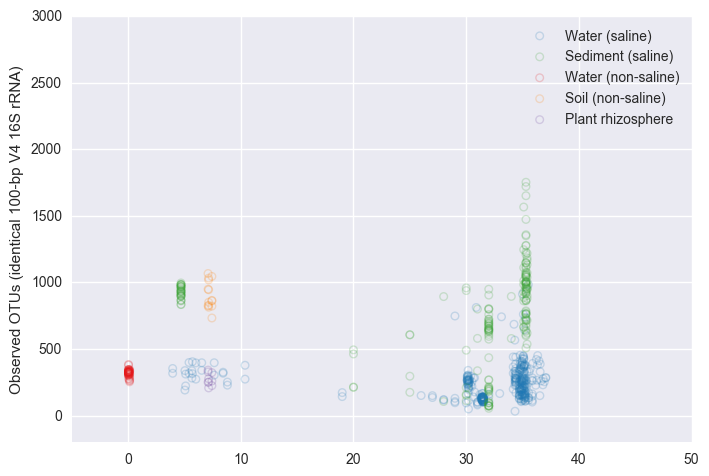

In [11]:
# SALINITY -- REDEFINE SALINE/NON-SALINE SPLIT AS 15 PSU (BRACKISH IS 5-30 PSU)

j = 0
for sample_type in df_merged[[not np.isnan(x[1]) for x in df_merged.salinity_psu.iteritems()]].empo_3.value_counts().index:
    make_scatter(df_merged[df_merged.empo_3 == sample_type], 'salinity_psu', 'observed_otus', sample_type, colors[j])
    plt.legend()
    j += 1
plt.ylim(-200, 3000)
plt.xlim(-5, 50)
plt.ylabel('Observed OTUs (identical 100-bp V4 16S rRNA)')



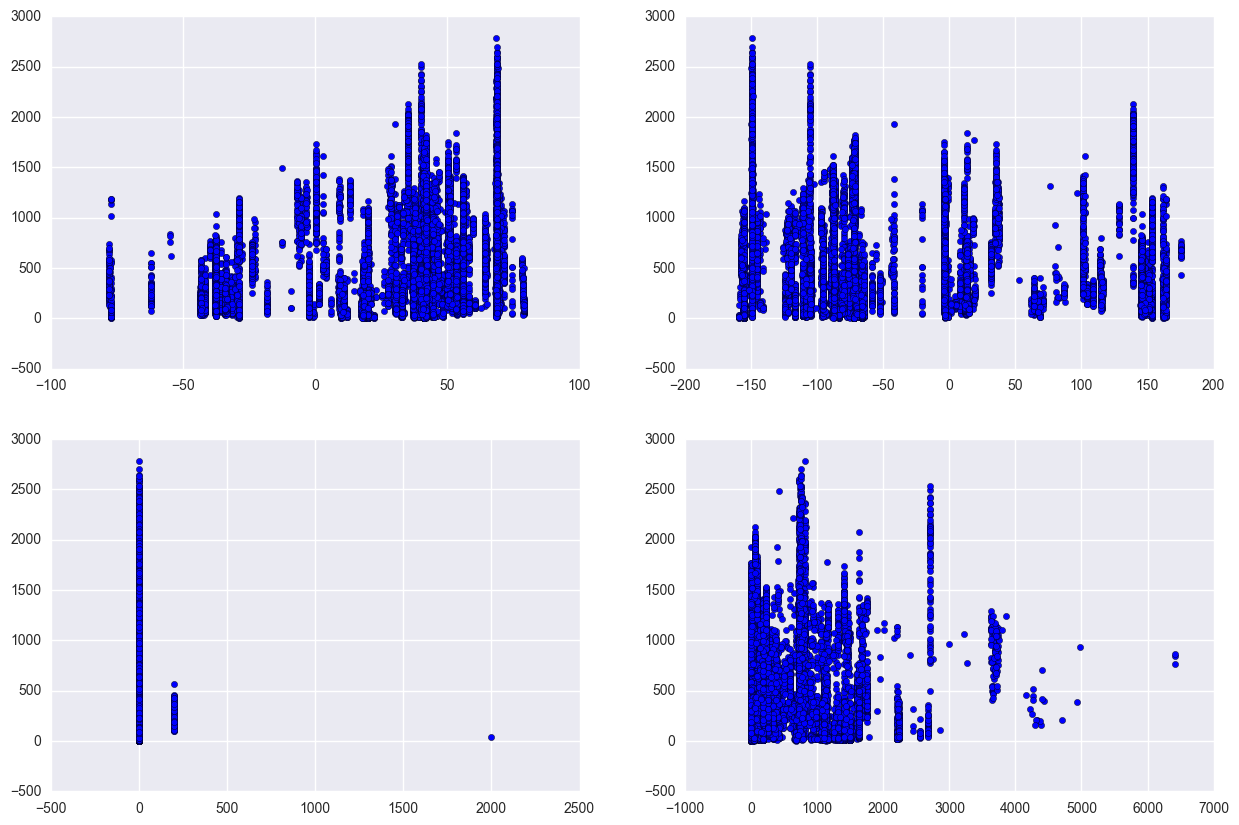

In [12]:
plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.scatter(df_merged['latitude_deg'], df_merged['observed_otus'])

plt.subplot(2,2,2)
plt.scatter(df_merged['longitude_deg'], df_merged['observed_otus'])

plt.subplot(2,2,3)
plt.scatter(df_merged['altitude_m'], df_merged['observed_otus'])

plt.subplot(2,2,4)
plt.scatter(df_merged['elevation_m'], df_merged['observed_otus'])